In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.dataset import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
path = "/home/mahathi/Desktop/Workspace/fast_ai/data/plantseed/"

In [4]:
sz=224
bs=28

In [5]:
jpg_img = plt.imread(f'/home/mahathi/Desktop/Workspace/fast_ai/data/plantseed/train/Black-grass/082314602.png')

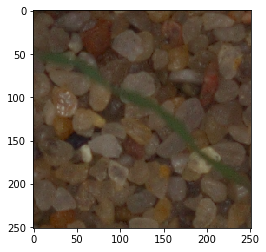

In [6]:
plt.imshow(jpg_img)

In [7]:
jpg_img.shape

(251, 251, 3)

In [8]:
arch=resnet34

In [10]:
resized_data = ImageClassifierData.from_paths(path, tfms=tfms_from_model(arch, sz))

In [11]:
learn = ConvLearner.pretrained(arch, resized_data, precompute=True)

100%|██████████| 14/14 [00:02<00:00,  4.83it/s]


In [12]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 43%|████▎     | 26/61 [00:00<00:00, 37.41it/s, loss=12.6]


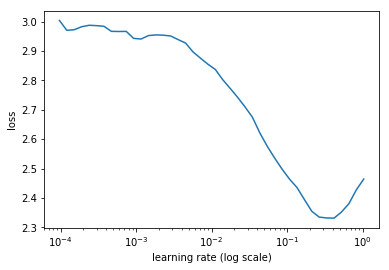

In [13]:
learn.sched.plot()

In [15]:
learn.fit(0.05, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch:   0, train_loss: 0.623686, val_loss: 0.561290, accuracy: 0.807023
epoch:   1, train_loss: 0.574447, val_loss: 0.483925, accuracy: 0.844892
epoch:   2, train_loss: 0.530268, val_loss: 0.457023, accuracy: 0.847124
epoch:   3, train_loss: 0.480158, val_loss: 0.464650, accuracy: 0.843231
epoch:   4, train_loss: 0.447727, val_loss: 0.460201, accuracy: 0.851095



In [16]:
tfms_model = tfms_from_model(arch, sz,aug_tfms=transforms_side_on, max_zoom=1.1)

In [17]:
learn = ConvLearner.pretrained(arch, ImageClassifierData.from_paths(path, bs=bs,tfms=tfms_model), precompute=True)

In [18]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 63%|██████▎   | 88/139 [00:00<00:00, 103.83it/s, loss=9.19]


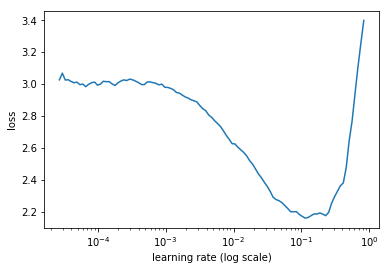

In [19]:
learn.sched.plot()

In [21]:
learn.fit(0.01,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch:   0, train_loss: 0.674967, val_loss: 0.553553, accuracy: 0.805804
epoch:   1, train_loss: 0.639988, val_loss: 0.518315, accuracy: 0.820312
epoch:   2, train_loss: 0.577462, val_loss: 0.480486, accuracy: 0.838170
epoch:   3, train_loss: 0.528767, val_loss: 0.489573, accuracy: 0.823661
epoch:   4, train_loss: 0.524266, val_loss: 0.459398, accuracy: 0.852679



In [22]:
learn.precompute=False

In [23]:
learn.fit(0.01,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch:   0, train_loss: 0.684289, val_loss: 0.477933, accuracy: 0.841518
epoch:   1, train_loss: 0.645391, val_loss: 0.466313, accuracy: 0.844866
epoch:   2, train_loss: 0.636430, val_loss: 0.470638, accuracy: 0.819196
epoch:   3, train_loss: 0.578802, val_loss: 0.434600, accuracy: 0.853795
epoch:   4, train_loss: 0.566411, val_loss: 0.426541, accuracy: 0.860491



In [24]:
learn.unfreeze()

In [25]:
lr = np.array([1e-4,1e-3,1e-2])

In [26]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.480021, val_loss: 0.303101, accuracy: 0.883929
epoch:   1, train_loss: 0.344686, val_loss: 0.228167, accuracy: 0.927455
epoch:   2, train_loss: 0.209585, val_loss: 0.211567, accuracy: 0.933036
epoch:   3, train_loss: 0.217444, val_loss: 0.215133, accuracy: 0.926339
epoch:   4, train_loss: 0.184545, val_loss: 0.192928, accuracy: 0.940848
epoch:   5, train_loss: 0.128626, val_loss: 0.175940, accuracy: 0.953125
epoch:   6, train_loss: 0.118892, val_loss: 0.174695, accuracy: 0.955357



In [27]:
log_predicts, y = learn.TTA()

In [ ]:
lr = np.array([9e-2,3e-2,1e-2])

In [29]:
probs = np.mean(np.exp(log_predicts),0)

In [30]:
accuracy(probs, y)

0.96